In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist
from keras.layers import*

In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.optimizers import Adam

In [0]:
(X_Train,_), (_,_) = mnist.load_data()

In [10]:
print(X_Train.shape)

(60000, 28, 28)


In [12]:
### normalize the data
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(X_Train.min(), X_Train.max())

-1.0 1.0


In [15]:
### flatten the data
X_Train = X_Train.reshape(-1, 28*28)
print(X_Train.shape)

(60000, 784)


In [0]:
EPOCHS = 60
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH_SIZE = 128
NOISE_DIM = 100
adam = Adam(lr = 2e-4, beta_1=0.5)

In [0]:
### generator

generator = Sequential()
generator.add(Dense(256, input_shape = (NOISE_DIM, )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))


In [0]:
generator.compile(loss = 'binary_crossentropy', optimizer = adam)

In [71]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 784)               803600    
Total para

In [0]:
### discriminator

discriminator = Sequential()
discriminator.add(Dense(512, input_shape = (784, )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam)

In [73]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
### combined model (Generator + Discriminator) -> Functional API
discriminator.trainable = False
gan_input = Input(shape = (NOISE_DIM, ))
generator_output = generator(gan_input)

gan_output = discriminator(generator_output)

model = Model(gan_input, gan_output)

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [77]:
!mkdir images
!mkdir models

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘models’: File exists


In [0]:
def showImage(epoch):
  noise = noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(-1, 28, 28)
  
  plt.figure(figsize=(10, 10))
  for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(generated_imgs[i], cmap = 'gray', interpolation = 'nearest')
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.savefig('images/gan_output{0}.png'.format(epoch + 1))
  

Epochs 1 D loss 147.5184 G loss 221.6280


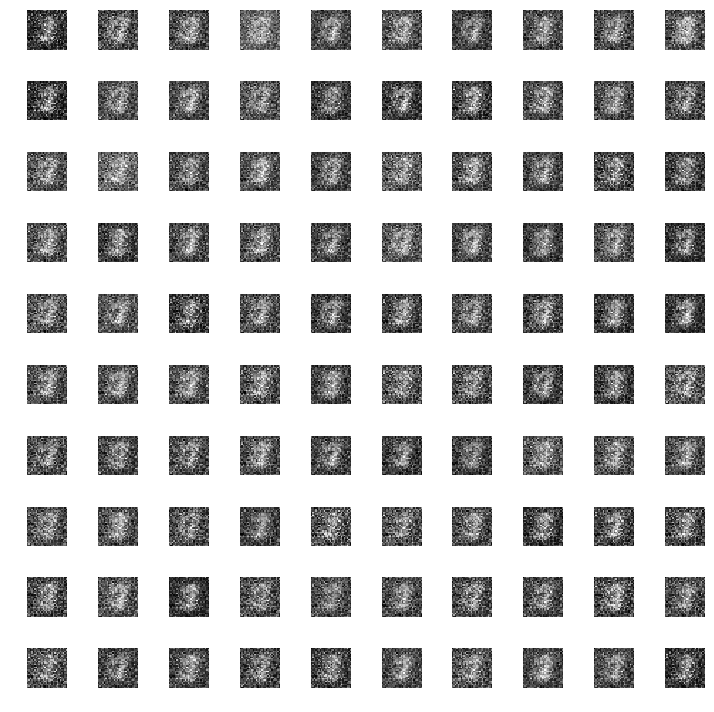

Epochs 2 D loss 152.5650 G loss 231.0625
Epochs 3 D loss 149.3393 G loss 253.6233
Epochs 4 D loss 143.3399 G loss 275.3251
Epochs 5 D loss 141.0369 G loss 277.7777
Epochs 6 D loss 135.9084 G loss 294.3615


<Figure size 432x288 with 0 Axes>

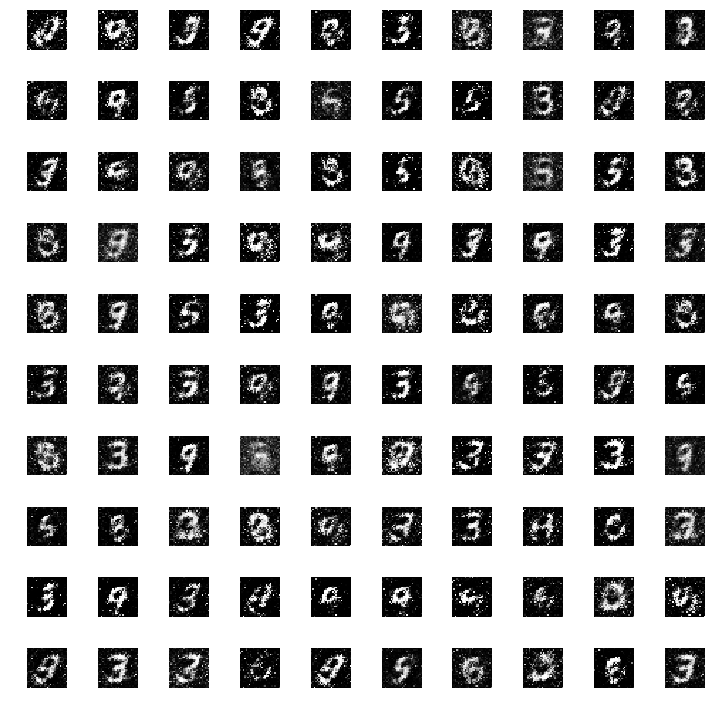

Epochs 7 D loss 137.6099 G loss 289.9465
Epochs 8 D loss 137.2713 G loss 285.9544
Epochs 9 D loss 141.2024 G loss 276.4174
Epochs 10 D loss 148.8683 G loss 248.7798
Epochs 11 D loss 149.7081 G loss 243.0498


<Figure size 432x288 with 0 Axes>

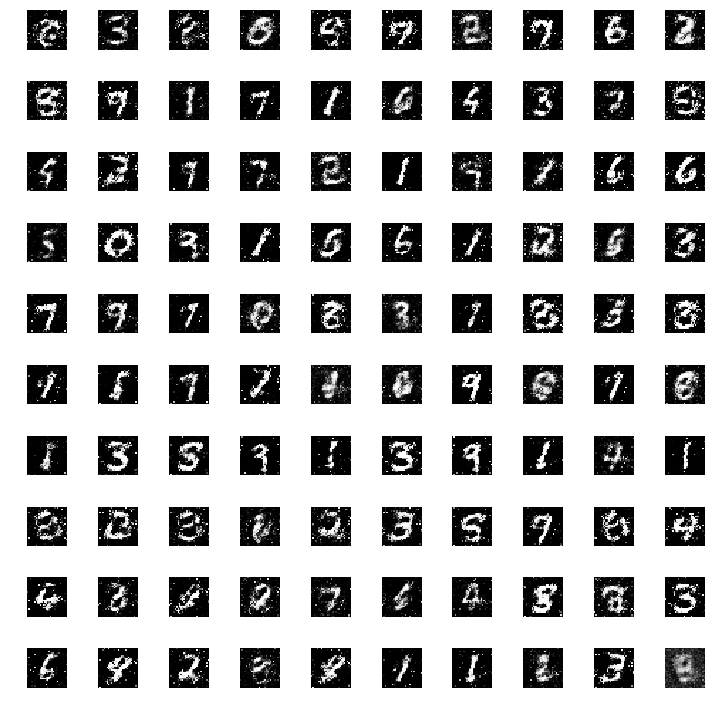

Epochs 12 D loss 150.3538 G loss 240.9517
Epochs 13 D loss 150.9890 G loss 240.5222
Epochs 14 D loss 150.4825 G loss 239.5026
Epochs 15 D loss 150.6291 G loss 240.6150
Epochs 16 D loss 150.8044 G loss 239.2762


<Figure size 432x288 with 0 Axes>

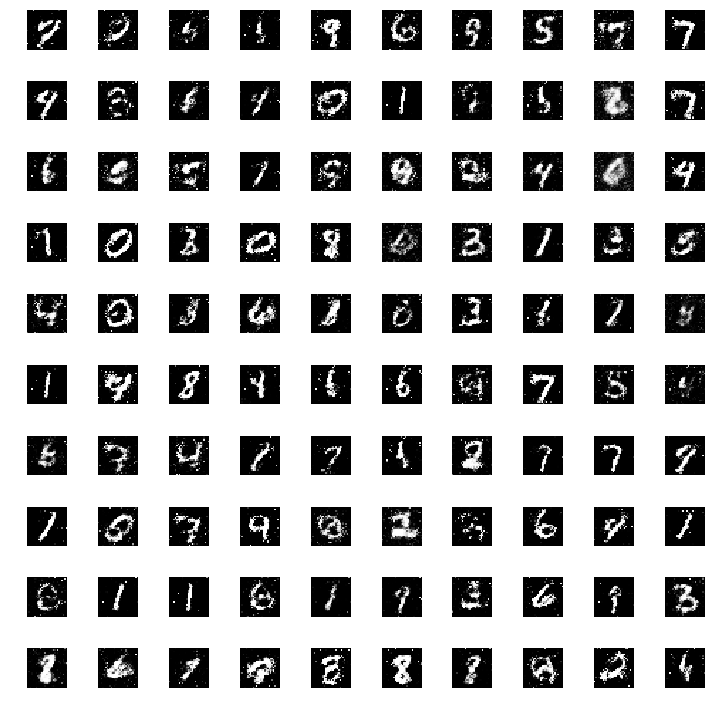

Epochs 17 D loss 151.4544 G loss 239.0357
Epochs 18 D loss 151.9961 G loss 236.4905
Epochs 19 D loss 151.0374 G loss 238.1102
Epochs 20 D loss 151.5596 G loss 237.7236
Epochs 21 D loss 151.2193 G loss 239.3847


<Figure size 432x288 with 0 Axes>

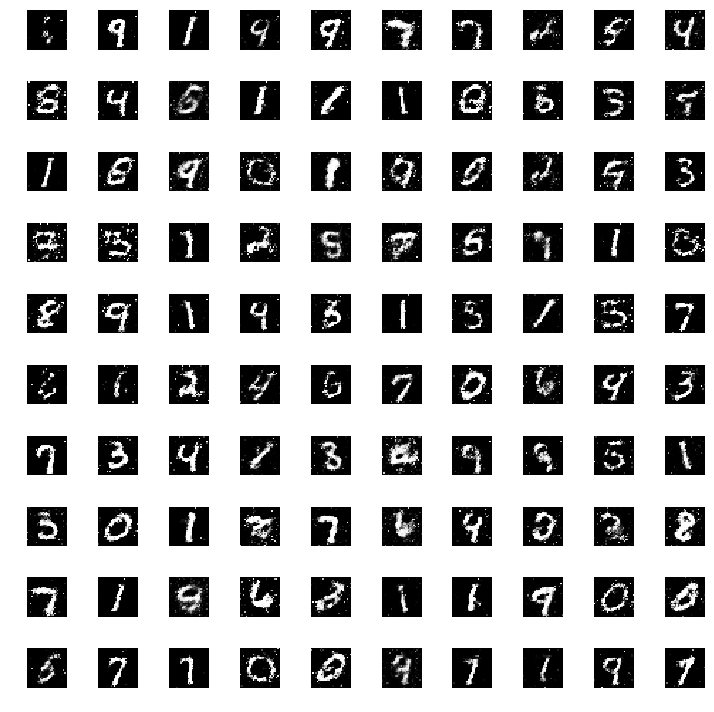

Epochs 22 D loss 151.2650 G loss 239.4554
Epochs 23 D loss 151.9276 G loss 240.8807
Epochs 24 D loss 152.2035 G loss 239.3920
Epochs 25 D loss 151.8315 G loss 239.1283
Epochs 26 D loss 152.2470 G loss 238.5691


<Figure size 432x288 with 0 Axes>

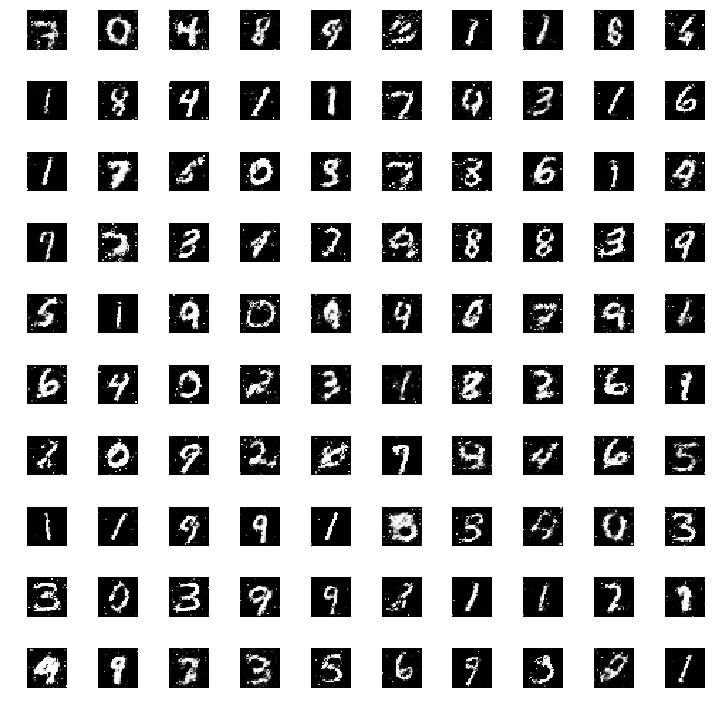

Epochs 27 D loss 152.6510 G loss 238.4771
Epochs 28 D loss 152.7742 G loss 237.3778
Epochs 29 D loss 152.9131 G loss 236.9744
Epochs 30 D loss 153.4167 G loss 235.1472
Epochs 31 D loss 152.9382 G loss 235.7942


<Figure size 432x288 with 0 Axes>

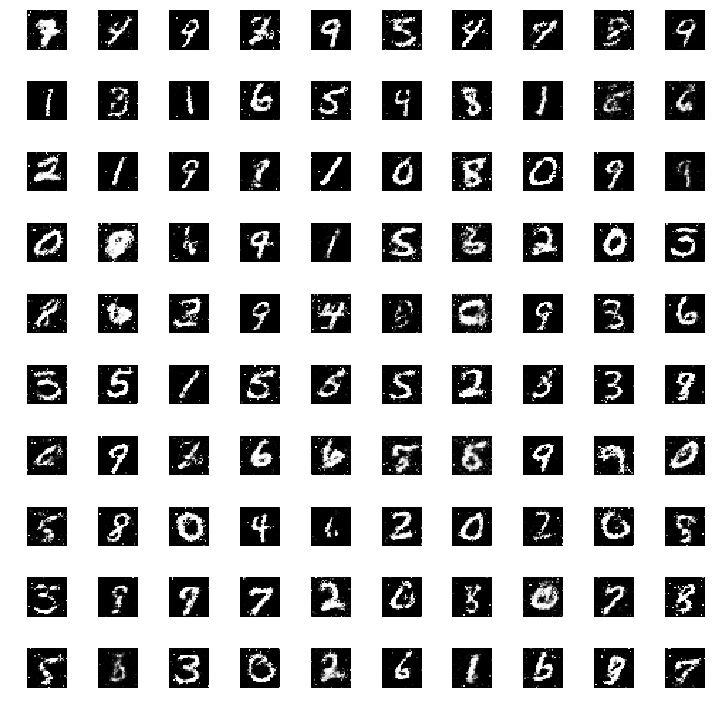

Epochs 32 D loss 153.3763 G loss 237.2805
Epochs 33 D loss 153.8842 G loss 235.1560
Epochs 34 D loss 153.9050 G loss 234.8205
Epochs 35 D loss 153.4864 G loss 235.8609
Epochs 36 D loss 153.9305 G loss 234.6088


<Figure size 432x288 with 0 Axes>

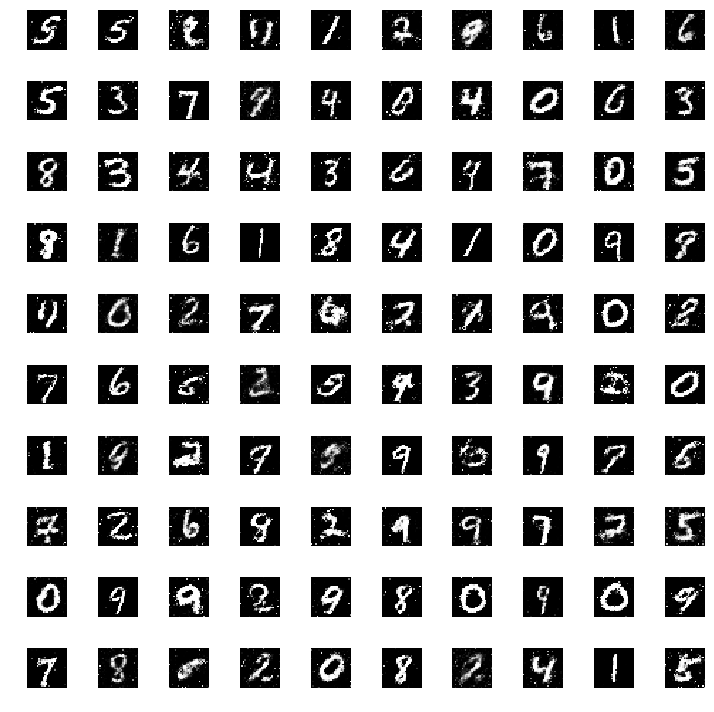

Epochs 37 D loss 154.4163 G loss 232.1652
Epochs 38 D loss 154.1052 G loss 233.1217
Epochs 39 D loss 154.5003 G loss 234.2236
Epochs 40 D loss 154.3160 G loss 233.1793
Epochs 41 D loss 154.4077 G loss 234.0413


<Figure size 432x288 with 0 Axes>

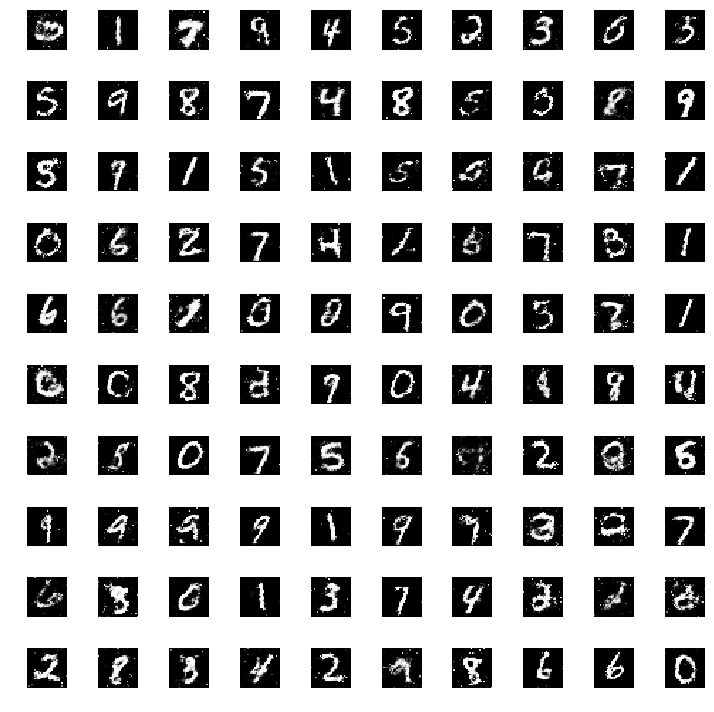

Epochs 42 D loss 154.0671 G loss 233.9036
Epochs 43 D loss 154.2807 G loss 234.7474
Epochs 44 D loss 154.4009 G loss 233.7291
Epochs 45 D loss 154.4427 G loss 233.8606
Epochs 46 D loss 154.5676 G loss 234.2838


<Figure size 432x288 with 0 Axes>

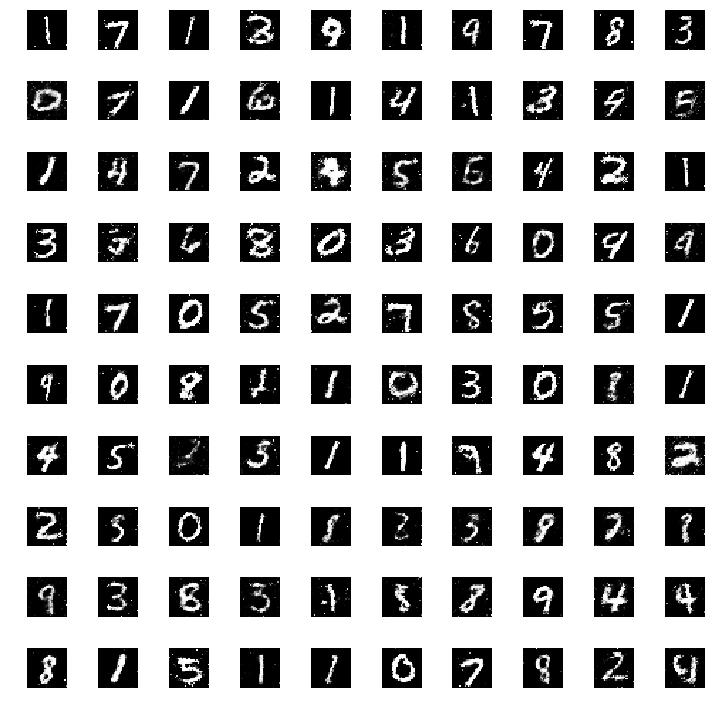

Epochs 47 D loss 154.7897 G loss 233.5908
Epochs 48 D loss 154.6988 G loss 232.9778
Epochs 49 D loss 154.6912 G loss 235.7757
Epochs 50 D loss 154.6597 G loss 233.7061
Epochs 51 D loss 154.5926 G loss 234.1372


<Figure size 432x288 with 0 Axes>

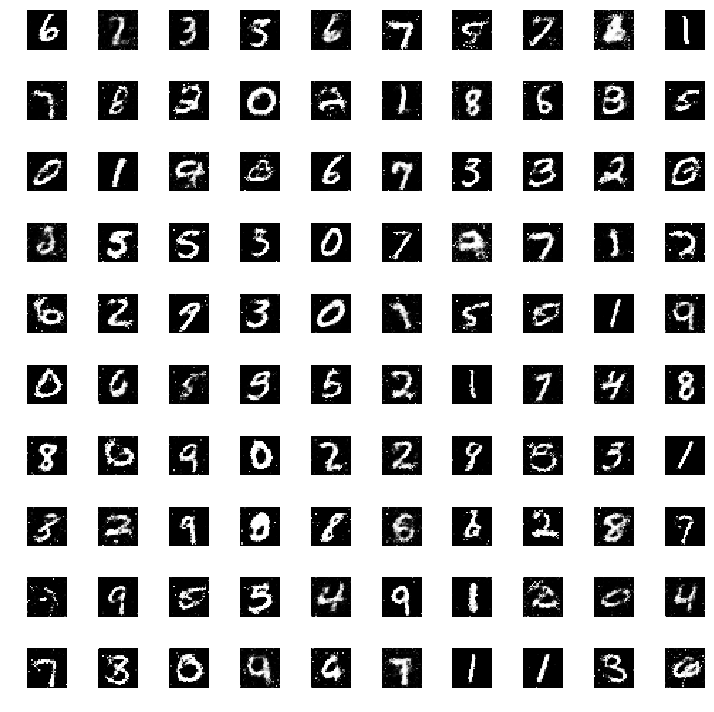

Epochs 52 D loss 154.6873 G loss 233.2450
Epochs 53 D loss 155.0036 G loss 232.4186
Epochs 54 D loss 154.6594 G loss 234.1842
Epochs 55 D loss 155.3451 G loss 232.9268
Epochs 56 D loss 154.6777 G loss 233.4773


<Figure size 432x288 with 0 Axes>

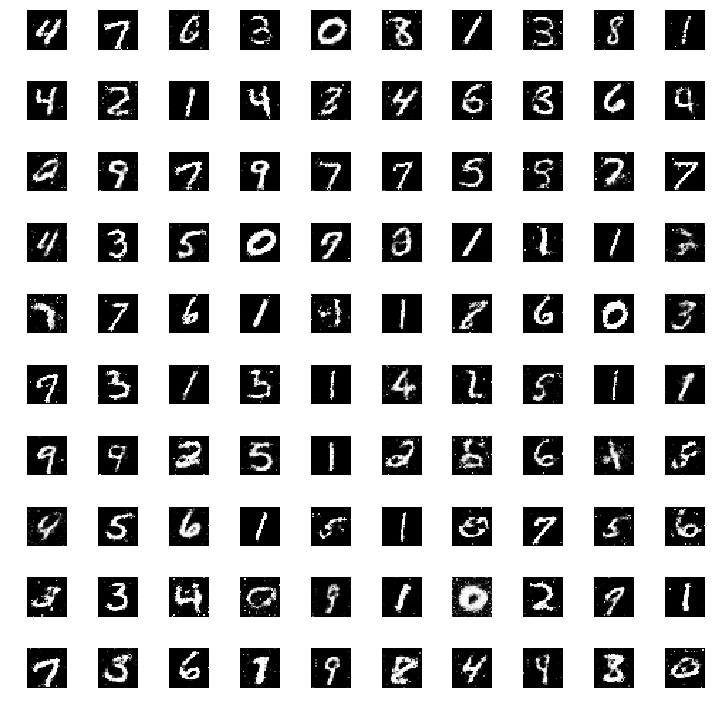

Epochs 57 D loss 154.9947 G loss 231.9393
Epochs 58 D loss 154.9682 G loss 232.3392
Epochs 59 D loss 155.1819 G loss 233.5351
Epochs 60 D loss 155.1892 G loss 233.6015


<Figure size 432x288 with 0 Axes>

In [79]:
g_losses = []
d_losses = []

### training loop
for epoch in range(EPOCHS):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0
  
  # Mini Batch
  for step in range(NO_OF_BATCHES):
    idx = np.random.randint(0, X_Train.shape[0], HALF_BATCH_SIZE)
    real_imgs = X_Train[idx]
    
    # generate fake image assuming generator is frozen
    noise = np.random.normal(0, 1, size=(HALF_BATCH_SIZE, NOISE_DIM))
    fake_imgs = generator.predict(noise)
    
    # lables
    real_y = np.ones((HALF_BATCH_SIZE, 1))*0.9
    fake_y = np.zeros((HALF_BATCH_SIZE, 1))
    
    # Train on Real and Fake Images
    d_real_loss = discriminator.train_on_batch(real_imgs, real_y)
    d_fake_loss = discriminator.train_on_batch(fake_imgs, fake_y)
    
    d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
    epoch_d_loss += d_loss
    
    
    # Train Generator
    noise = np.random.normal(0, 1, size = (BATCH_SIZE, NOISE_DIM))
    real_y = np.ones((BATCH_SIZE, 1))
    g_loss = model.train_on_batch(noise,real_y)
    
    epoch_g_loss += g_loss
 

  print('Epochs %d D loss %.4f G loss %.4f'%(epoch + 1, epoch_d_loss, epoch_g_loss))
  if (epoch%5) == 0:
    generator.save('models/gen_{0}.h5'.format(epoch))
    showImage(epoch)